The following notebook contains python code that uses the reddit API and the Praw python library to scrape user generated comments and data from the Nike subreddit, load the scraped social media data and clean the text data. It then Stems and Displays a sample of the stemmed data, Lemmatizes and displays a sample of the lemmatized data then lastly Uses word cloud to visualize the data and lastly Saves the cleaned data to a new CSV file.

2999                                     [glad, abl, get]
5589                                        [thank, dude]
5921    [lol, im, troll, bit, og, color, way, og, rele...
3431    [yeah, realiz, post, stupid, lol, box, didnt, ...
758                            [nike, air, vortex, ‘, 17]
5736                                         [cant, hear]
6834                     [bro, nahhh, nike, violat, him💀]
4536                              [favorit, summer, shoe]
764     [thank, im, look, one, photo, rather, mockup, ...
2853    [ja, play, mental, health, card, kyri, didnt, ...
Name: stemmed_text, dtype: object
7055        [hell, nah, adidas, best, nike, much, better]
1882                                    [literally, 🧍‍♀️]
34        [white, black, swoosh, thought, would, obvious]
6931    [agreed, last, pair, forum, tried, funky, hell...
1865                                             [trying]
3762    [’, interested, blackwhite, pair, tan, pair, w...
6701    [second, one, jordan, 1, low, 

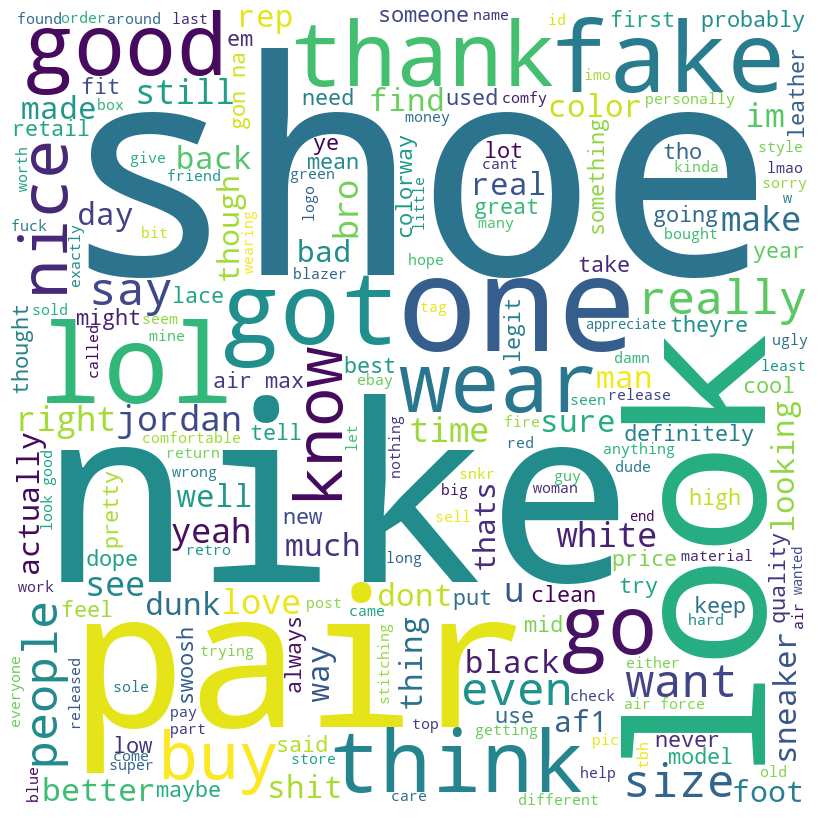

In [1]:
import praw
import pandas as pd
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Step 1: Set up the Reddit API credentials
reddit = praw.Reddit(
    client_id='your client id',
    client_secret='your secret key',
    username='your username',
    password='your password',
    user_agent='user agent'
)

# Step 2: Scrape user-generated comments and data from their subreddit
subreddit = reddit.subreddit('nike')
limit = 1000
posts = []

for post in subreddit.new(limit=limit):
    comments = post.comments.list()
    for comment in comments:
        try:
            body = comment.body
            posts.append(body)
        except:
            continue

# Step 3: Create a Jupyter notebook and Import necessary libraries

# Step 4: Load social media data
df = pd.DataFrame(posts, columns=['text'])

# Step 5: Clean the text data
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove special characters
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Convert text to lowercase
    text = text.lower()

    # Tokenize the text data
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stop_words]

    return filtered_tokens

df['clean_text'] = df['text'].apply(clean_text)

# Step 6: Stem and display a sample of the stemmed data
ps = PorterStemmer()

def stem_text(tokens):
    stemmed = [ps.stem(token) for token in tokens]
    return stemmed

df['stemmed_text'] = df['clean_text'].apply(stem_text)

print(df['stemmed_text'].sample(10))

# Step 7: Lemmatize and display a sample of the lemmatized data in step 6
wnl = WordNetLemmatizer()

def lemmatize_text(tokens):
    lemmatized = [wnl.lemmatize(token) for token in tokens]
    return lemmatized

df['lemmatized_text'] = df['clean_text'].apply(lemmatize_text)

print(df['lemmatized_text'].sample(10))

# Step 8: Use word cloud to visualize the data in step 7
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(' '.join(df['lemmatized_text'].sum()))

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

# Step 9: Save the cleaned data to a new CSV file
df.to_csv('cleaned_data.csv', index=False)

